<div align="right">20190301 Naoaki ONO, Shigehiko KANAYA <br/>
NAIST DSC</div>

# はじめてのGoogle Colaboratory

Google ColaboratoryはGoogleがサービスしているクラウド上で提供されるJupyter notebookの実行環境です。

クラウドを借りている関係上、長時間の計算や大量のデータの処理などにはあまり向きませんが、簡単なプログラムをテストするには十ニ分に便利な計算環境と言えます。


## Jupyter notebook
Jupyter notebookはこの文章のようなテキストを記述する「テキストセル」と、
プログラムを入力したり実行結果を表示したりする「コードセル」が混在した「ノートブック」と呼ばれるファイル形式です。Webブラウザだけで操作可能な点、環境構築が手軽な点などから、主にデータ解析の分野で近年人気が出ています。

### セル
「テキストセル」ではHTMLのように文章を「マークダウンタグ」でいろいろ加工して表示したり、LaTeXのように数式を埋め込んだりすることができます。

*イタリック*や**ボールド**、

こんな数式$p(D) = \int_0^1 p(D|w)p(w) dw$やこんな数式$\frac{n!}{k! (n-k)!}$のほか、

- リスト
- などを
- 使うことができます。

「コードセル」では対話的にプログラムを実行できます（Google ColaboratoryではPythonを使っていますが、自分で環境を構築すればRやJuliaなど様々な言語に対応させることが可能です）。プリント文などの実行結果や変数の表示はコードセルに続いて表示されます。


下のコードセルをクリックして選択し、左の矢印マークをクリックするかShift+Returnを押してみましょう。

In [26]:
print("Hello, Google Colaboratory!\n")

Hello, Google Colaboratory!



print文が実行され、文字列が表示されたはずです。

電卓がわりに色々な計算を実行させることもできます。

In [27]:
(123 + 456) / 789

0.7338403041825095

より高度な計算をするにはPythonのライブラリであるnumpyを利用します。

ライブラリをロードするにはimport命令を使います。

In [28]:
import numpy as np

np.sqrt(2)


1.4142135623730951

## グラフのプロット

計算したデータをもとにグラフをプロットして、図をノート内に張り込むこともできます。

Pythonを使った図の描画にはシンプルなものから高度なものまでいろいろなグラフ描画ツールが提供されています。
ここでは二つほどサンプルを実行してみます。より複雑な図を描画するにはマニュアルを参照してください。

まずサンプルデータをインポートしておきます。

In [30]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

cars.shape

(406, 9)

### matplotlib
基本的な描画ライブラリとして定番の一つである[matplotlib](https://matplotlib.org)を使ってみましょう。

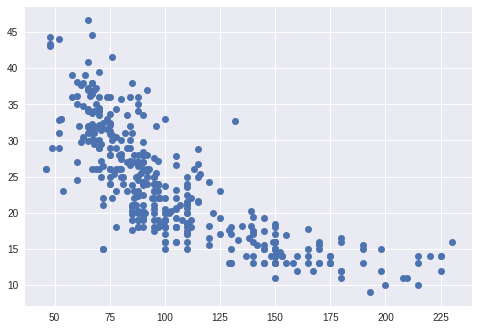

In [31]:
import matplotlib.pyplot as plt
plt.plot(cars['Horsepower'], cars['Miles_per_Gallon'],"o")

### Altair
同じデータを比較的最近出てきたツールである
[Altair](https://altair-viz.github.io/)を使ってプロットしてみましょう。


In [32]:
# plot the dataset, referencing dataframe column names
import altair as alt

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0       165.0               NaN   
  12           11.0          8         351.0       153.0               NaN   
  13           10.5          8         383.0       175.0               NaN   
  14           11.0          8         360.0       175.0               NaN   
  15           10.0          8         383.0       170.0              15.0   
  16            8.0          8         340.0       160.0              14.0   
  17            8.0          8         302.0       140.0               NaN   
  18            9.5          8         400.0       150.0              15.0   
  19           10.0          8         455.0       225.0              14.0   
  20           15.0          4         113.0        95.0              24.0   
  21           15.5          6         198.0        95.0              22.0   
  22           15.5          6         199.0        97.0              18.0   
  23           16.0          6         200.0        85.0              21.0   
  24           14.5          4          97.0        88.0              27.0   
  25           20.5          4          97.0        46.0              26.0   
  26           17.5          4         110.0        87.0              25.0   
  27           14.5          4         107.0        90.0              24.0   
  28           17.5          4         104.0        95.0              25.0   
  29           12.5          4         121.0       113.0              26.0   
  ..            ...        ...           ...         ...               ...   
  376          18.6          4         112.0        88.0              27.0   
  377          18.0          4         112.0        88.0              34.0   
  378          16.2          4         112.0        85.0              31.0   
  379          16.0          4         135.0        84.0              29.0   
  380          18.0          4         151.0        90.0              27.0   
  381          16.4          4         140.0        92.0              24.0   
  382          20.5          4         151.0         NaN              23.0   
  383          15.3          4         105.0        74.0              36.0   
  384          18.2          4          91.0        68.0              37.0   
  385          17.6          4          91.0        68.0              31.0   
  386          14.7          4         105.0        63.0              38.0   
  387          17.3          4          98.0        70.0              36.0   
  388          14.5          4         120.0        88.0              36.0   
  389          14.5          4         107.0        75.0              36.0   
  390          16.9          4         108.0        70.0              34.0   
  391          15.0          4          91.0        67.0              38.0   
  392          15.7          4          91.0        67.0              32.0   
  393          16.2          4          91.0        67.0              38.0   
  394          16.4          6         181.0       110.0              25.0   
  395   

こちらは図をマウスドラッグして座標軸を移動させたり、ホイールで拡大縮小したりできるのが特徴です。

`x`と`y`に適当な乱数を生成して、いろいろなプロットを試してみましょう。

In [0]:
import pandas as pd
x1 = np.random.normal(0,1,100)
y1 = np.random.normal(0,1,100)
tmp = pd.DataFrame({'x': x1,
                    'y': y1})

In [56]:
alt.Chart(tmp).mark_bar().encode(
  x='x',
  y='y',
)



Chart({
  data:            x         y
  0  -1.923425  1.298650
  1  -0.849099 -0.133966
  2   1.077817  1.428719
  3  -0.576420 -1.022742
  4   1.996262 -0.615118
  5  -0.155857 -1.408384
  6  -0.884161  1.859640
  7   2.143746 -2.038838
  8  -0.279340 -1.067392
  9   2.933617  0.060634
  10 -0.324480 -0.704481
  11 -0.062790 -0.561836
  12 -1.831871  0.191005
  13 -0.737141  2.597583
  14  0.724464 -1.052763
  15  1.954485  0.646723
  16  0.720898 -0.158043
  17 -1.103763  0.459689
  18  0.219569  0.907380
  19  1.464178  0.502813
  20  1.020905  0.947040
  21 -1.309742 -0.371307
  22 -0.337012  0.380463
  23 -1.182798  0.455670
  24  0.414666  1.059123
  25 -0.792957 -0.662366
  26  1.179700  0.844484
  27 -0.939750  0.026646
  28  2.281582 -0.876879
  29  0.893850  0.114809
  ..       ...       ...
  70  0.206731  0.710337
  71 -1.313404  2.207692
  72  1.535608  1.508773
  73  1.126518  0.908092
  74 -1.406731 -2.935916
  75 -1.238447  0.896232
  76  0.387734  1.824560
  77  0.577429  1.412300
  78 -1.538894 -2.858707
  79 -1.470433 -0.059989
  80 -1.410283  0.131226
  81 -0.951210  1.096989
  82  0.704406 -0.942028
  83 -0.004355 -0.114158
  84  1.161241  0.860107
  85  1.195040 -0.393418
  86 -0.526395  1.699599
  87 -0.876947 -1.024302
  88  0.205641  0.846346
  89  0.795237 -0.233501
  90 -1.155934 -0.236106
  91  0.448738 -1.691789
  92 -2.180985  0.124616
  93 -1.535674  0.794231
  94  0.165539  0.095958
  95  1.494275  1.636666
  96 -0.868410  2.061019
  97 -1.956216  0.243771
  98  0.502294 -0.959953
  99  0.173218  0.754310
  
  [100 rows x 2 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'x'
    }),
    y: Y({
      shorthand: 'y'
    })
  }),
  mark: 'bar'
})

In [52]:
alt.Chart(tmp).mark_point().encode(
  x='x',
  y='y',
)


Chart({
  data:            x         y
  0  -1.923425  1.298650
  1  -0.849099 -0.133966
  2   1.077817  1.428719
  3  -0.576420 -1.022742
  4   1.996262 -0.615118
  5  -0.155857 -1.408384
  6  -0.884161  1.859640
  7   2.143746 -2.038838
  8  -0.279340 -1.067392
  9   2.933617  0.060634
  10 -0.324480 -0.704481
  11 -0.062790 -0.561836
  12 -1.831871  0.191005
  13 -0.737141  2.597583
  14  0.724464 -1.052763
  15  1.954485  0.646723
  16  0.720898 -0.158043
  17 -1.103763  0.459689
  18  0.219569  0.907380
  19  1.464178  0.502813
  20  1.020905  0.947040
  21 -1.309742 -0.371307
  22 -0.337012  0.380463
  23 -1.182798  0.455670
  24  0.414666  1.059123
  25 -0.792957 -0.662366
  26  1.179700  0.844484
  27 -0.939750  0.026646
  28  2.281582 -0.876879
  29  0.893850  0.114809
  ..       ...       ...
  70  0.206731  0.710337
  71 -1.313404  2.207692
  72  1.535608  1.508773
  73  1.126518  0.908092
  74 -1.406731 -2.935916
  75 -1.238447  0.896232
  76  0.387734  1.824560
  77  0.577429  1.412300
  78 -1.538894 -2.858707
  79 -1.470433 -0.059989
  80 -1.410283  0.131226
  81 -0.951210  1.096989
  82  0.704406 -0.942028
  83 -0.004355 -0.114158
  84  1.161241  0.860107
  85  1.195040 -0.393418
  86 -0.526395  1.699599
  87 -0.876947 -1.024302
  88  0.205641  0.846346
  89  0.795237 -0.233501
  90 -1.155934 -0.236106
  91  0.448738 -1.691789
  92 -2.180985  0.124616
  93 -1.535674  0.794231
  94  0.165539  0.095958
  95  1.494275  1.636666
  96 -0.868410  2.061019
  97 -1.956216  0.243771
  98  0.502294 -0.959953
  99  0.173218  0.754310
  
  [100 rows x 2 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'x'
    }),
    y: Y({
      shorthand: 'y'
    })
  }),
  mark: 'point'
})

In [51]:
alt.Chart(tmp).mark_line().encode(
  x='x',
  y='y',
)

Chart({
  data:            x         y
  0  -1.923425  1.298650
  1  -0.849099 -0.133966
  2   1.077817  1.428719
  3  -0.576420 -1.022742
  4   1.996262 -0.615118
  5  -0.155857 -1.408384
  6  -0.884161  1.859640
  7   2.143746 -2.038838
  8  -0.279340 -1.067392
  9   2.933617  0.060634
  10 -0.324480 -0.704481
  11 -0.062790 -0.561836
  12 -1.831871  0.191005
  13 -0.737141  2.597583
  14  0.724464 -1.052763
  15  1.954485  0.646723
  16  0.720898 -0.158043
  17 -1.103763  0.459689
  18  0.219569  0.907380
  19  1.464178  0.502813
  20  1.020905  0.947040
  21 -1.309742 -0.371307
  22 -0.337012  0.380463
  23 -1.182798  0.455670
  24  0.414666  1.059123
  25 -0.792957 -0.662366
  26  1.179700  0.844484
  27 -0.939750  0.026646
  28  2.281582 -0.876879
  29  0.893850  0.114809
  ..       ...       ...
  70  0.206731  0.710337
  71 -1.313404  2.207692
  72  1.535608  1.508773
  73  1.126518  0.908092
  74 -1.406731 -2.935916
  75 -1.238447  0.896232
  76  0.387734  1.824560
  77  0.577429  1.412300
  78 -1.538894 -2.858707
  79 -1.470433 -0.059989
  80 -1.410283  0.131226
  81 -0.951210  1.096989
  82  0.704406 -0.942028
  83 -0.004355 -0.114158
  84  1.161241  0.860107
  85  1.195040 -0.393418
  86 -0.526395  1.699599
  87 -0.876947 -1.024302
  88  0.205641  0.846346
  89  0.795237 -0.233501
  90 -1.155934 -0.236106
  91  0.448738 -1.691789
  92 -2.180985  0.124616
  93 -1.535674  0.794231
  94  0.165539  0.095958
  95  1.494275  1.636666
  96 -0.868410  2.061019
  97 -1.956216  0.243771
  98  0.502294 -0.959953
  99  0.173218  0.754310
  
  [100 rows x 2 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'x'
    }),
    y: Y({
      shorthand: 'y'
    })
  }),
  mark: 'line'
})

## 補足: ランタイムセッションについて

インタプリタ型言語によるインタラクティブな開発に慣れていない方は混乱するかもしれませんが、Jupyter notebookでは一枚のページが一つの独立した「ランタイムセッション」になります。

新しいページを開いた場合は、たとえそれが同じファイルを開いたものだとしてもセッションの内容は別々になりますが、一つのセッションの中では（カーネルを再起動しない限り）グローバル変数の値などは個々のセルを超えて保持されています。

例えば作業の途中でセルの内容を編集して再度実行すれば変数の値には新しい結果が上書きされますし、編集の途中でそのページの古いセルに戻ってコードを実行した場合は、現在の変数の内容を古いセルでも参照することができます。

ただ、あとで実行結果が再現できるようにしたほうがわかりやすいので、基本的には上から順番にセルを実行して行けば結果が得られるように、適宜整理してプログラムを書くようにするほうがいいでしょう。

たとえば次のセルで値を初期化して、後のセルで上書きするようなプログラムの場合を見てみましょう。

In [0]:
a1 = 1
a2 = 1

現在の`a2`の値を確認します。

In [13]:
print(a2)

1


次のセルを繰り返し実行すれば、`a1,a2`の値はどんどん上書きされていきます。

In [25]:
a3 = a1 + a2
a1 = a2
a2 = a3
print(a1, a2)

233 377
